## EDA and Data Cleaning

### EDA
#### Import Modules

In [2]:
# -------------------------------------------------------------------------------------  import modules -------------------------------------------------------------------------------
from Functions import *
from Modules   import *

pd.set_option('display.max_columns', None)    # To view all columns 
# -------------------------------------------------------------------

df = pd.read_csv('..\\Data\\data_train.csv')
df.head()

IsBadBuy   PurchDate  Auction  VehYear  VehicleAge       Make  \
0         0  1257897600    OTHER     2007           2        KIA   
1         0  1231286400    ADESA     2005           4     SUZUKI   
2         1  1288656000    OTHER     2006           4  CHEVROLET   
3         0  1236124800  MANHEIM     2004           5  CHEVROLET   
4         0  1248307200  MANHEIM     2007           2   CHRYSLER   

                  Model Trim        SubModel   Color Transmission  \
0               SPECTRA  NaN     4D SEDAN EX   BLACK       MANUAL   
1   FORENZA 2.0L I4 EFI   EX        4D WAGON  SILVER         AUTO   
2                COBALT   LT     2D COUPE LT     RED         AUTO   
3   VENTURE FWD V6 3.4L   LS  PASSENGER 3.4L  SILVER         AUTO   
4  TOWN & COUNTRY 2WD V  Bas    MINIVAN 3.3L     RED         AUTO   

   WheelTypeID WheelType  VehOdo  Nationality     Size TopThreeAmericanName  \
0          1.0     Alloy   35547  OTHER ASIAN   MEDIUM                OTHER   
1          2.0    Covers   72131  OTHER ASIAN   MEDIUM                OTHER   
2          1.0     Alloy   77113     AMERICAN  COMPACT                   GM   
3          2.0    Covers   76202     AMERICAN      VAN                   GM   
4          1.0     Alloy   72653     AMERICAN      VAN             CHRYSLER   

   MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                             6079.0                           7322.0   
1                             4219.0                           4809.0   
2                             5293.0                           6668.0   
3                             3127.0                           3764.0   
4                                0.0                              0.0   

   MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
0                            7065.0                         8408.0   
1                            5057.0                         5694.0   
2                            8685.0                        10348.0   
3                            3877.0                         4565.0   
4                               0.0                            0.0   

   MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
0                         5669.0                       6807.0   
1                         4377.0                       5072.0   
2                         5084.0                       6014.0   
3                         3542.0                       4468.0   
4                            0.0                          0.0   

   MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                        9568.0                     10428.0       NaN   
1                        5227.0                      5978.0       NaN   
2                        8235.0                      9230.0       NaN   
3                        4325.0                      5325.0       NaN   
4                           0.0                         0.0       NaN   

  AUCGUART  BYRNO  VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
0      NaN   5546   35004   AL    6400.0             0           462  
1      NaN  20207   77086   TX    3870.0             0           569  
2      NaN   1235   84104   UT    5310.0             1           803  
3      NaN  20928   32824   FL    4600.0             0          4622  
4      NaN    835   85353   AZ    6215.0             0          1623

#### Convert Unix timestamp in 'PurchDate' to conventional time

In [3]:
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

print('df shape is:', df.shape, '\n', '-- '*35)
display(df.head(3))
print('\n', '-- '*35)
df.info()

df shape is: (65620, 33) 
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0         0 2009-11-11   OTHER     2007           2        KIA   
1         0 2009-01-07   ADESA     2005           4     SUZUKI   
2         1 2010-11-02   OTHER     2006           4  CHEVROLET   

                 Model Trim     SubModel   Color Transmission  WheelTypeID  \
0              SPECTRA  NaN  4D SEDAN EX   BLACK       MANUAL          1.0   
1  FORENZA 2.0L I4 EFI   EX     4D WAGON  SILVER         AUTO          2.0   
2               COBALT   LT  2D COUPE LT     RED         AUTO          1.0   

  WheelType  VehOdo  Nationality     Size TopThreeAmericanName  \
0     Alloy   35547  OTHER ASIAN   MEDIUM                OTHER   
1    Covers   72131  OTHER ASIAN   MEDIUM                OTHER   
2     Alloy   77113     AMERICAN  COMPACT                   GM   

   MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                             6079.0                           7322.0   
1                             4219.0                           4809.0   
2                             5293.0                           6668.0   

   MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
0                            7065.0                         8408.0   
1                            5057.0                         5694.0   
2                            8685.0                        10348.0   

   MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
0                         5669.0                       6807.0   
1                         4377.0                       5072.0   
2                         5084.0                       6014.0   

   MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                        9568.0                     10428.0       NaN   
1                        5227.0                      5978.0       NaN   
2                        8235.0                      9230.0       NaN   

  AUCGUART  BYRNO  VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
0      NaN   5546   35004   AL    6400.0             0           462  
1      NaN  20207   77086   TX    3870.0             0           569  
2      NaN   1235   84104   UT    5310.0             1           803


 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9

#### Chjecking for dublicates in df

In [4]:
# There are no dublicates in the data

print('There are no dublicates in the data')
df[df.duplicated()].shape

There are no dublicates in the data


(0, 33)

#### Elements in every categorical feature of the Dataframe

In [5]:
pd.set_option('display.max_colwidth', None)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

unique_couts  = df.select_dtypes(include = 'object').nunique()
unique_values = [list(df[col].unique()) for col in df.select_dtypes(include = 'object').columns]

print('\n', 'Elements in every categorical feature of the Dataframe')
print('-- '*20)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

pd.DataFrame({'Unique counts' : unique_couts, 
                                      'Unique_values' : unique_values})



 Elements in every categorical feature of the Dataframe
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


Unique counts  \
Auction                           3   
Make                             29   
Model                          1029   
Trim                            134   
SubModel                        840   
Color                            16   
Transmission                      3   
WheelType                         3   
Nationality                       4   
Size                             12   
TopThreeAmericanName              4   
PRIMEUNIT                         2   
AUCGUART                          2   
VNST                             34   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique_values  
Auction                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [OTHER, ADESA, MANHEIM]  
Make                                                  

#### Distribution of Good and Bad Buys in df

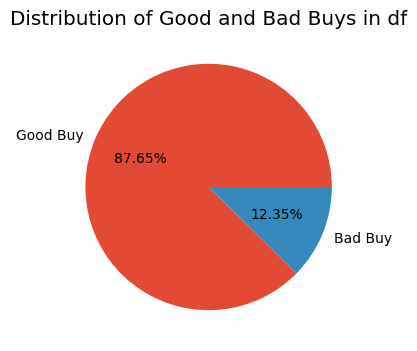

In [6]:
fig, ax = plt.subplots(figsize = [4,4])
plt.style.use('ggplot')
# ----------------------------------------------------------

target_distribution = pd.crosstab(index     = df['IsBadBuy'], 
                                  columns   = 'count', 
                                  normalize = True)

target_distribution.plot(kind    = 'pie', 
                         y       = 'count', 
                         labels  = ['Good Buy', 'Bad Buy'],
                         autopct = '%.2f%%',
                         legend  = False,
                         ax     = ax)

ax.set_title('Distribution of Good and Bad Buys in df')
ax.set_ylabel('');

#### Pair Plot

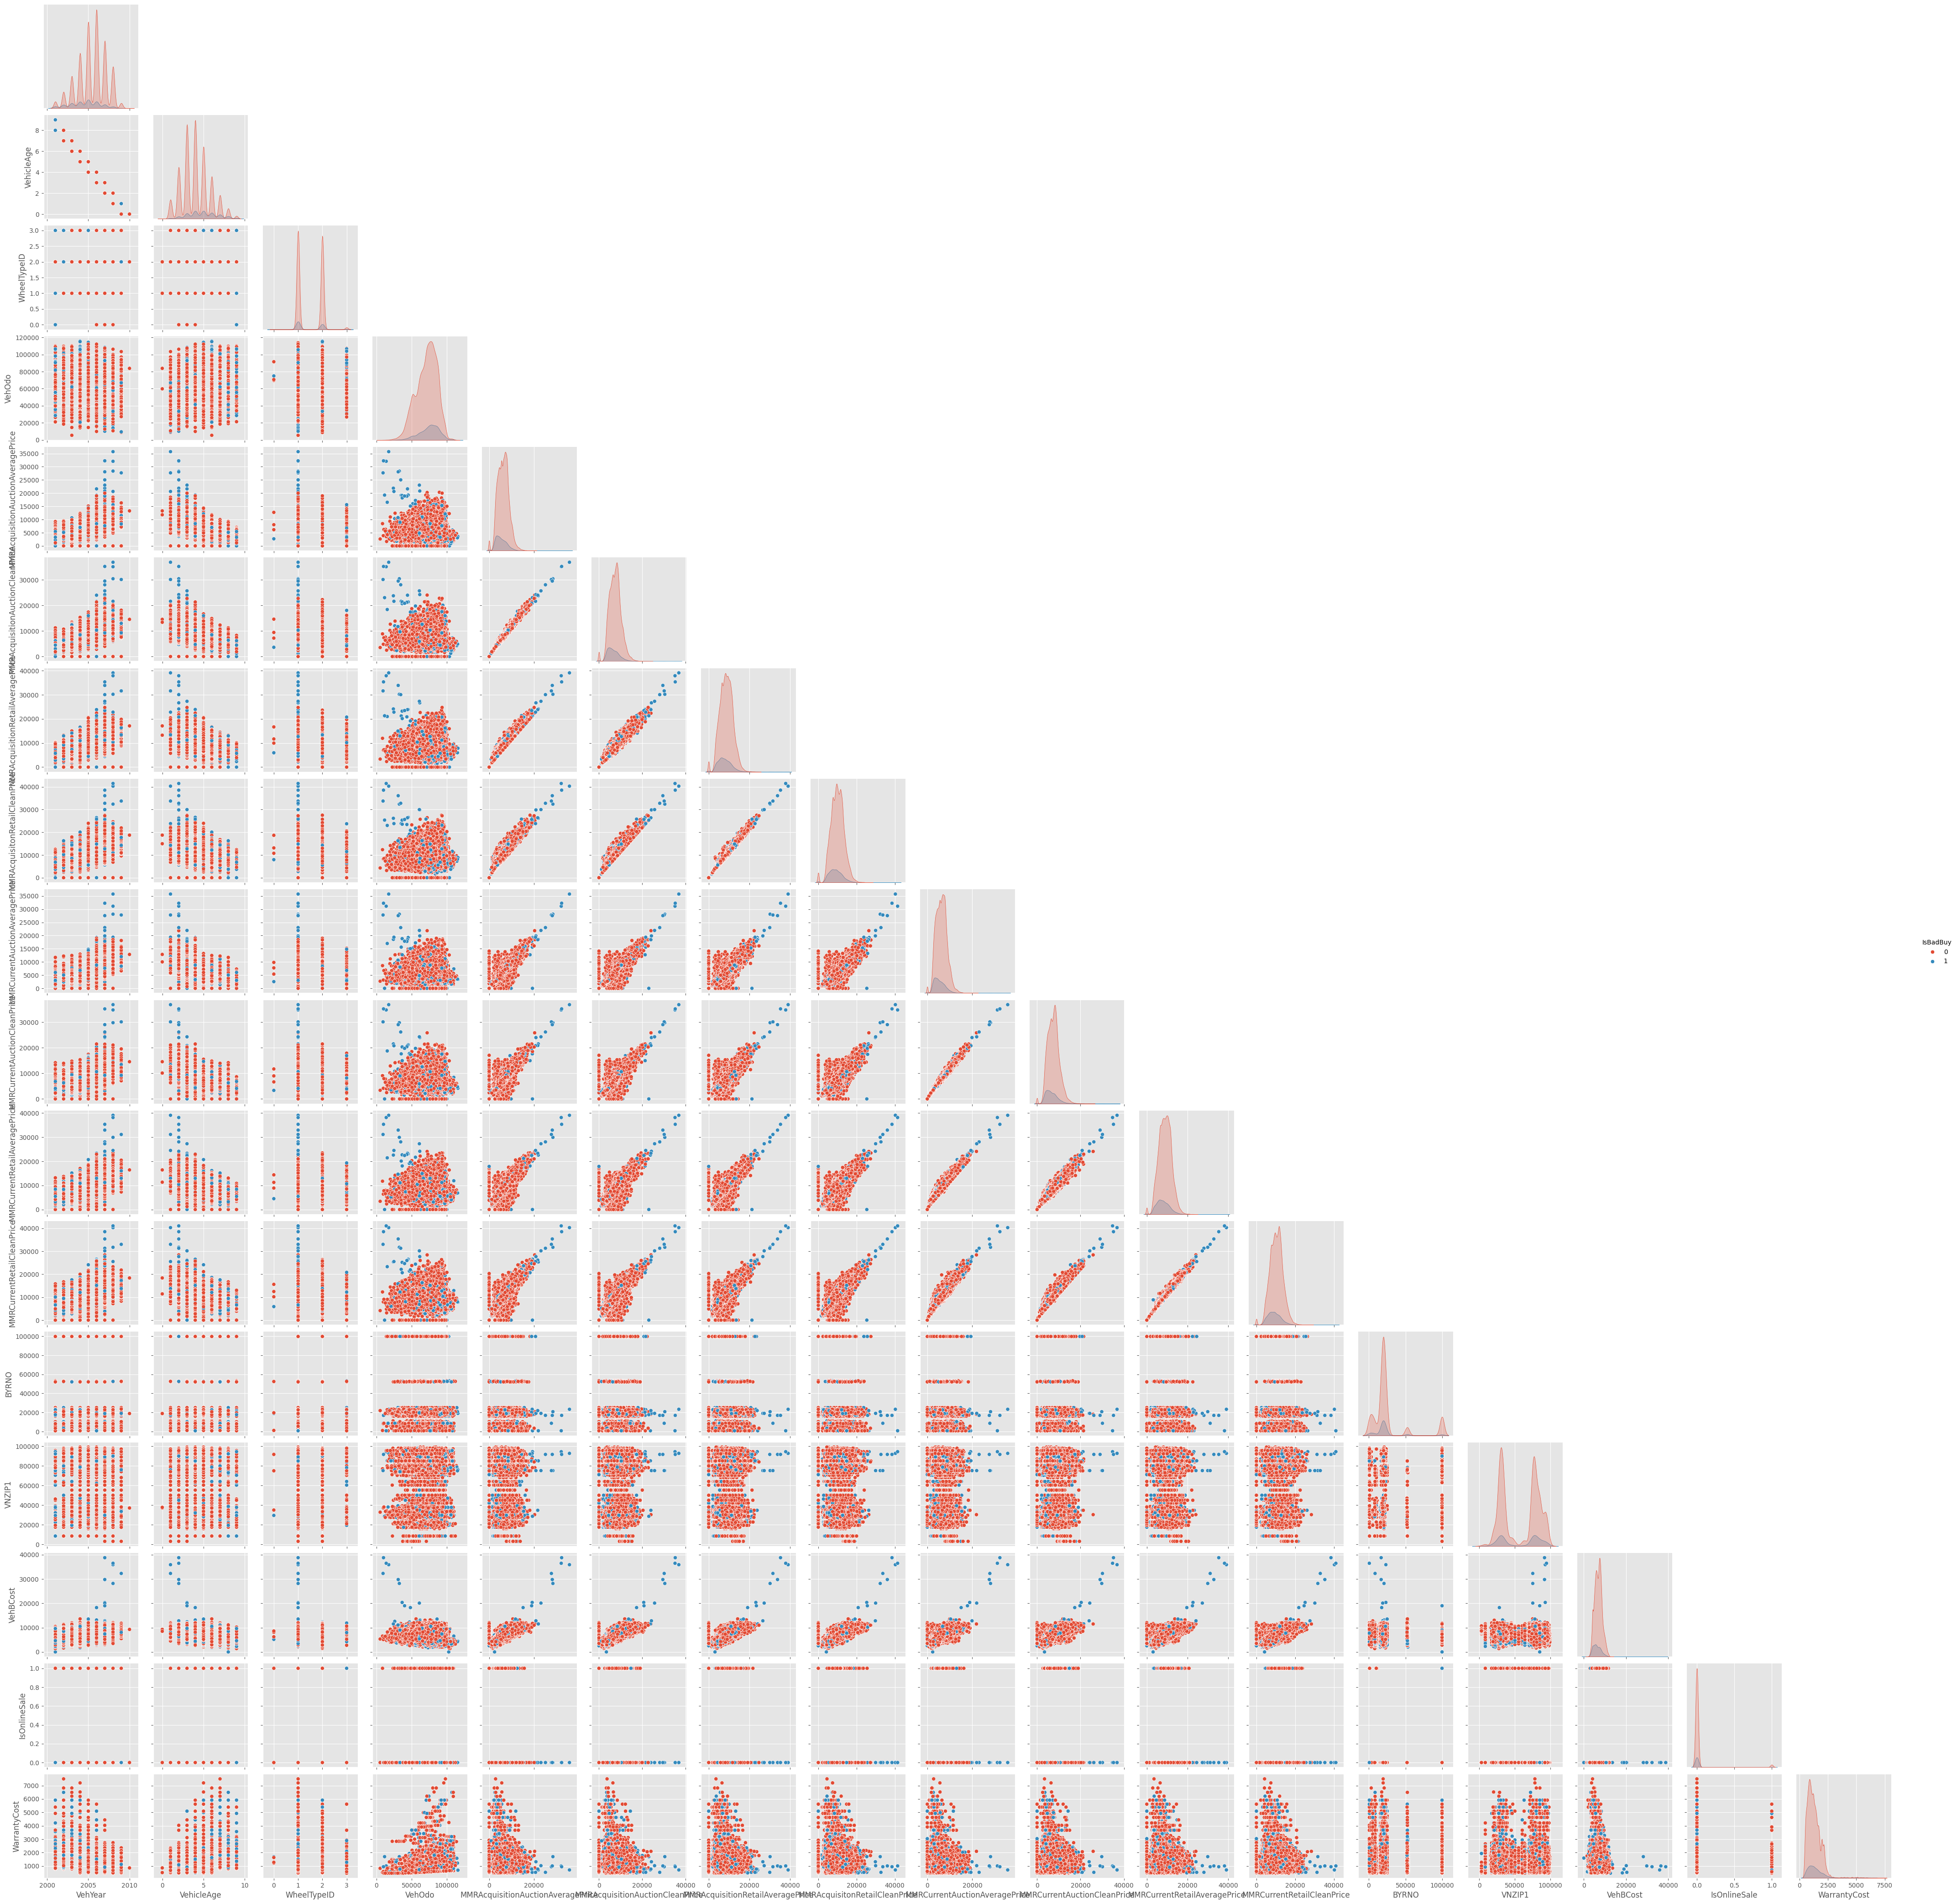

In [7]:
plt.style.use('ggplot')
# -- -- -- -- -- -- -- -- -- -- 

sns.pairplot(data   = df,    
             corner = True, 
             hue    = 'IsBadBuy'
             );

#### Correlation among numerical variables 

In [8]:
df.corr(numeric_only=True)

IsBadBuy   VehYear  VehicleAge  \
IsBadBuy                           1.000000 -0.158831    0.166345   
VehYear                           -0.158831  1.000000   -0.957884   
VehicleAge                         0.166345 -0.957884    1.000000   
WheelTypeID                       -0.045503  0.258164   -0.249643   
VehOdo                             0.082339 -0.284761    0.321200   
MMRAcquisitionAuctionAveragePrice -0.110846  0.583201   -0.567443   
MMRAcquisitionAuctionCleanPrice   -0.104518  0.534999   -0.520552   
MMRAcquisitionRetailAveragePrice  -0.089655  0.583686   -0.462922   
MMRAcquisitonRetailCleanPrice     -0.085906  0.541739   -0.428395   
MMRCurrentAuctionAveragePrice     -0.111043  0.592622   -0.577150   
MMRCurrentAuctionCleanPrice       -0.105893  0.550248   -0.534019   
MMRCurrentRetailAveragePrice      -0.105842  0.600088   -0.505247   
MMRCurrentRetailCleanPrice        -0.102224  0.560370   -0.470616   
BYRNO                             -0.062218  0.280807   -0.268002   
VNZIP1                             0.005092  0.067263   -0.073848   
VehBCost                          -0.105178  0.352389   -0.314148   
IsOnlineSale                      -0.003991  0.057696   -0.025345   
WarrantyCost                       0.053290 -0.269218    0.260806   

                                   WheelTypeID    VehOdo  \
IsBadBuy                             -0.045503  0.082339   
VehYear                               0.258164 -0.284761   
VehicleAge                           -0.249643  0.321200   
WheelTypeID                           1.000000 -0.213733   
VehOdo                               -0.213733  1.000000   
MMRAcquisitionAuctionAveragePrice    -0.096494 -0.017089   
MMRAcquisitionAuctionCleanPrice      -0.130663  0.024335   
MMRAcquisitionRetailAveragePrice     -0.073683  0.031122   
MMRAcquisitonRetailCleanPrice        -0.103030  0.062733   
MMRCurrentAuctionAveragePrice        -0.089333 -0.028015   
MMRCurrentAuctionCleanPrice          -0.121956  0.012478   
MMRCurrentRetailAveragePrice         -0.075686  0.016564   
MMRCurrentRetailCleanPrice           -0.103569  0.048444   
BYRNO                                 0.187190 -0.289358   
VNZIP1                                0.005904 -0.053318   
VehBCost                             -0.162480 -0.059555   
IsOnlineSale                         -0.008463  0.030262   
WarrantyCost                         -0.132769  0.412299   

                                   MMRAcquisitionAuctionAveragePrice  \
IsBadBuy                                                   -0.110846   
VehYear                                                     0.583201   
VehicleAge                                                 -0.567443   
WheelTypeID                                                -0.096494   
VehOdo                                                     -0.017089   
MMRAcquisitionAuctionAveragePrice                           1.000000   
MMRAcquisitionAuctionCleanPrice                             0.990356   
MMRAcquisitionRetailAveragePrice                            0.910186   
MMRAcquisitonRetailCleanPrice                               0.909916   
MMRCurrentAuctionAveragePrice                               0.937882   
MMRCurrentAuctionCleanPrice                                 0.932402   
MMRCurrentRetailAveragePrice                                0.871838   
MMRCurrentRetailCleanPrice                                  0.870958   
BYRNO                                                       0.109162   
VNZIP1                                                      0.044803   
VehBCost                                                    0.789630   
IsOnlineSale                                                0.039992   
WarrantyCost                                               -0.050998   

                                   MMRAcquisitionAuctionCleanPrice  \
IsBadBuy                                                 -0.104518   
VehYear                                                   0.534999   
Veh

#### Correlation heatmap

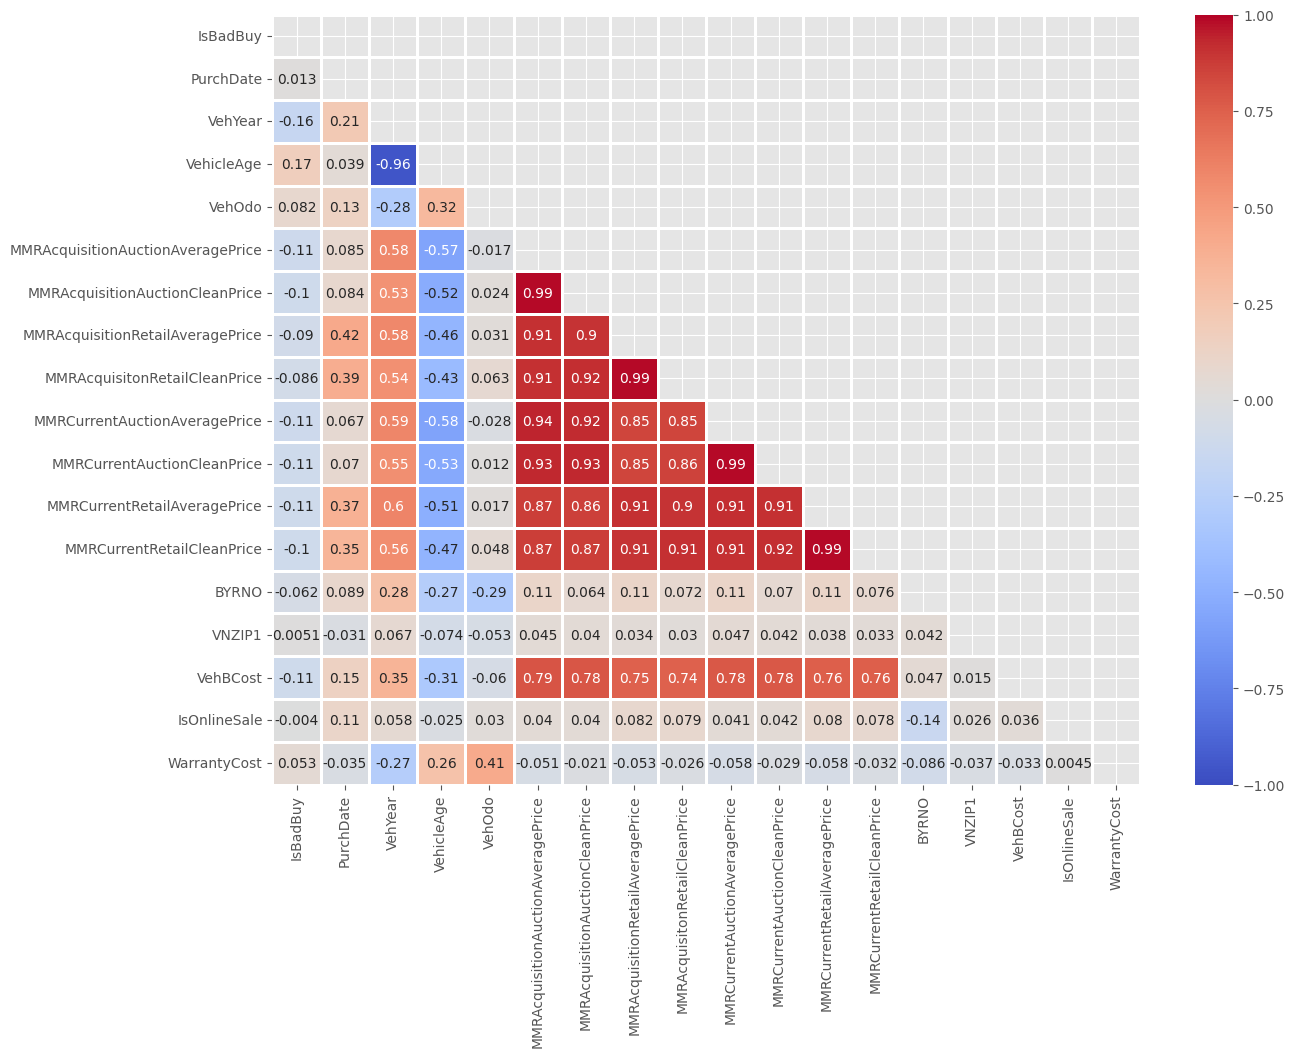

In [30]:
fig, ax = plt.subplots(figsize = [14,10])
# ---------------------------------------------

sns.heatmap(df.corr(numeric_only=True),
            mask       = np.triu(df.corr(numeric_only=True)),
            vmin       = -1, 
            vmax       = 1, 
            cmap       ='coolwarm', 
            annot      = True, 
            linewidths = 1,
            linecolor  = 'white');

#### Discription od numerical features

In [10]:
df.describe().T

count                           mean  \
IsBadBuy                           65620.0                       0.123499   
PurchDate                            65620  2010-01-10 09:56:45.571472128   
VehYear                            65620.0                    2005.345215   
VehicleAge                         65620.0                        4.17513   
WheelTypeID                        62747.0                       1.494589   
VehOdo                             65620.0                    71505.93028   
MMRAcquisitionAuctionAveragePrice  65602.0                    6127.143807   
MMRAcquisitionAuctionCleanPrice    65602.0                    7371.157236   
MMRAcquisitionRetailAveragePrice   65602.0                     8498.24077   
MMRAcquisitonRetailCleanPrice      65602.0                    9851.611003   
MMRCurrentAuctionAveragePrice      65330.0                    6131.694092   
MMRCurrentAuctionCleanPrice        65330.0                    7389.951768   
MMRCurrentRetailAveragePrice       65330.0                    8776.866019   
MMRCurrentRetailCleanPrice         65330.0                   10145.912582   
BYRNO                              65620.0                   26363.516931   
VNZIP1                             65620.0                    58090.45413   
VehBCost                           65564.0                    6727.464264   
IsOnlineSale                       65620.0                       0.025236   
WarrantyCost                       65620.0                    1277.375815   

                                                   min                  25%  \
IsBadBuy                                           0.0                  0.0   
PurchDate                          2009-01-05 00:00:00  2009-07-20 00:00:00   
VehYear                                         2001.0               2004.0   
VehicleAge                                         0.0                  3.0   
WheelTypeID                                        0.0                  1.0   
VehOdo                                          5368.0             61844.75   
MMRAcquisitionAuctionAveragePrice                  0.0               4273.0   
MMRAcquisitionAuctionCleanPrice                    0.0               5405.0   
MMRAcquisitionRetailAveragePrice                   0.0               6279.0   
MMRAcquisitonRetailCleanPrice                      0.0               7494.0   
MMRCurrentAuctionAveragePrice                      0.0               4275.0   
MMRCurrentAuctionCleanPrice                        0.0               5412.0   
MMRCurrentRetailAveragePrice                       0.0               6540.0   
MMRCurrentRetailCleanPrice                         0.0              7790.25   
BYRNO                                            835.0              17212.0   
VNZIP1                                          3106.0              32124.0   
VehBCost                                           1.0               5435.0   
IsOnlineSale                                       0.0                  0.0   
WarrantyCost                                     462.0                837.0   

                                                   50%                  75%  \
IsBadBuy                                           0.0                  0.0   
PurchDate                          2010-01-21 00:00:00  2010-07-14 00:00:00   
VehYear                                         2005.0               2007.0   
VehicleAge                                         4.0                  5.0   
WheelTypeID                                        1.0                  2.0   
VehOdo                                         73378.5              82440.0   
MMRAcquisitionAuctionAveragePrice               6094.0               7765.0   
MMRAcquisitionAuctionCleanPrice                 7303.0              9018.75   
MMRAcquisitionRetailAveragePrice                8447.0              10658.0   
MMRAcquisitonRetailCleanPrice                   9792.0              12094.0   
MMRCurrentAuctionAveragePrice                 

#### Boxplots/Histograms of the numerical features 

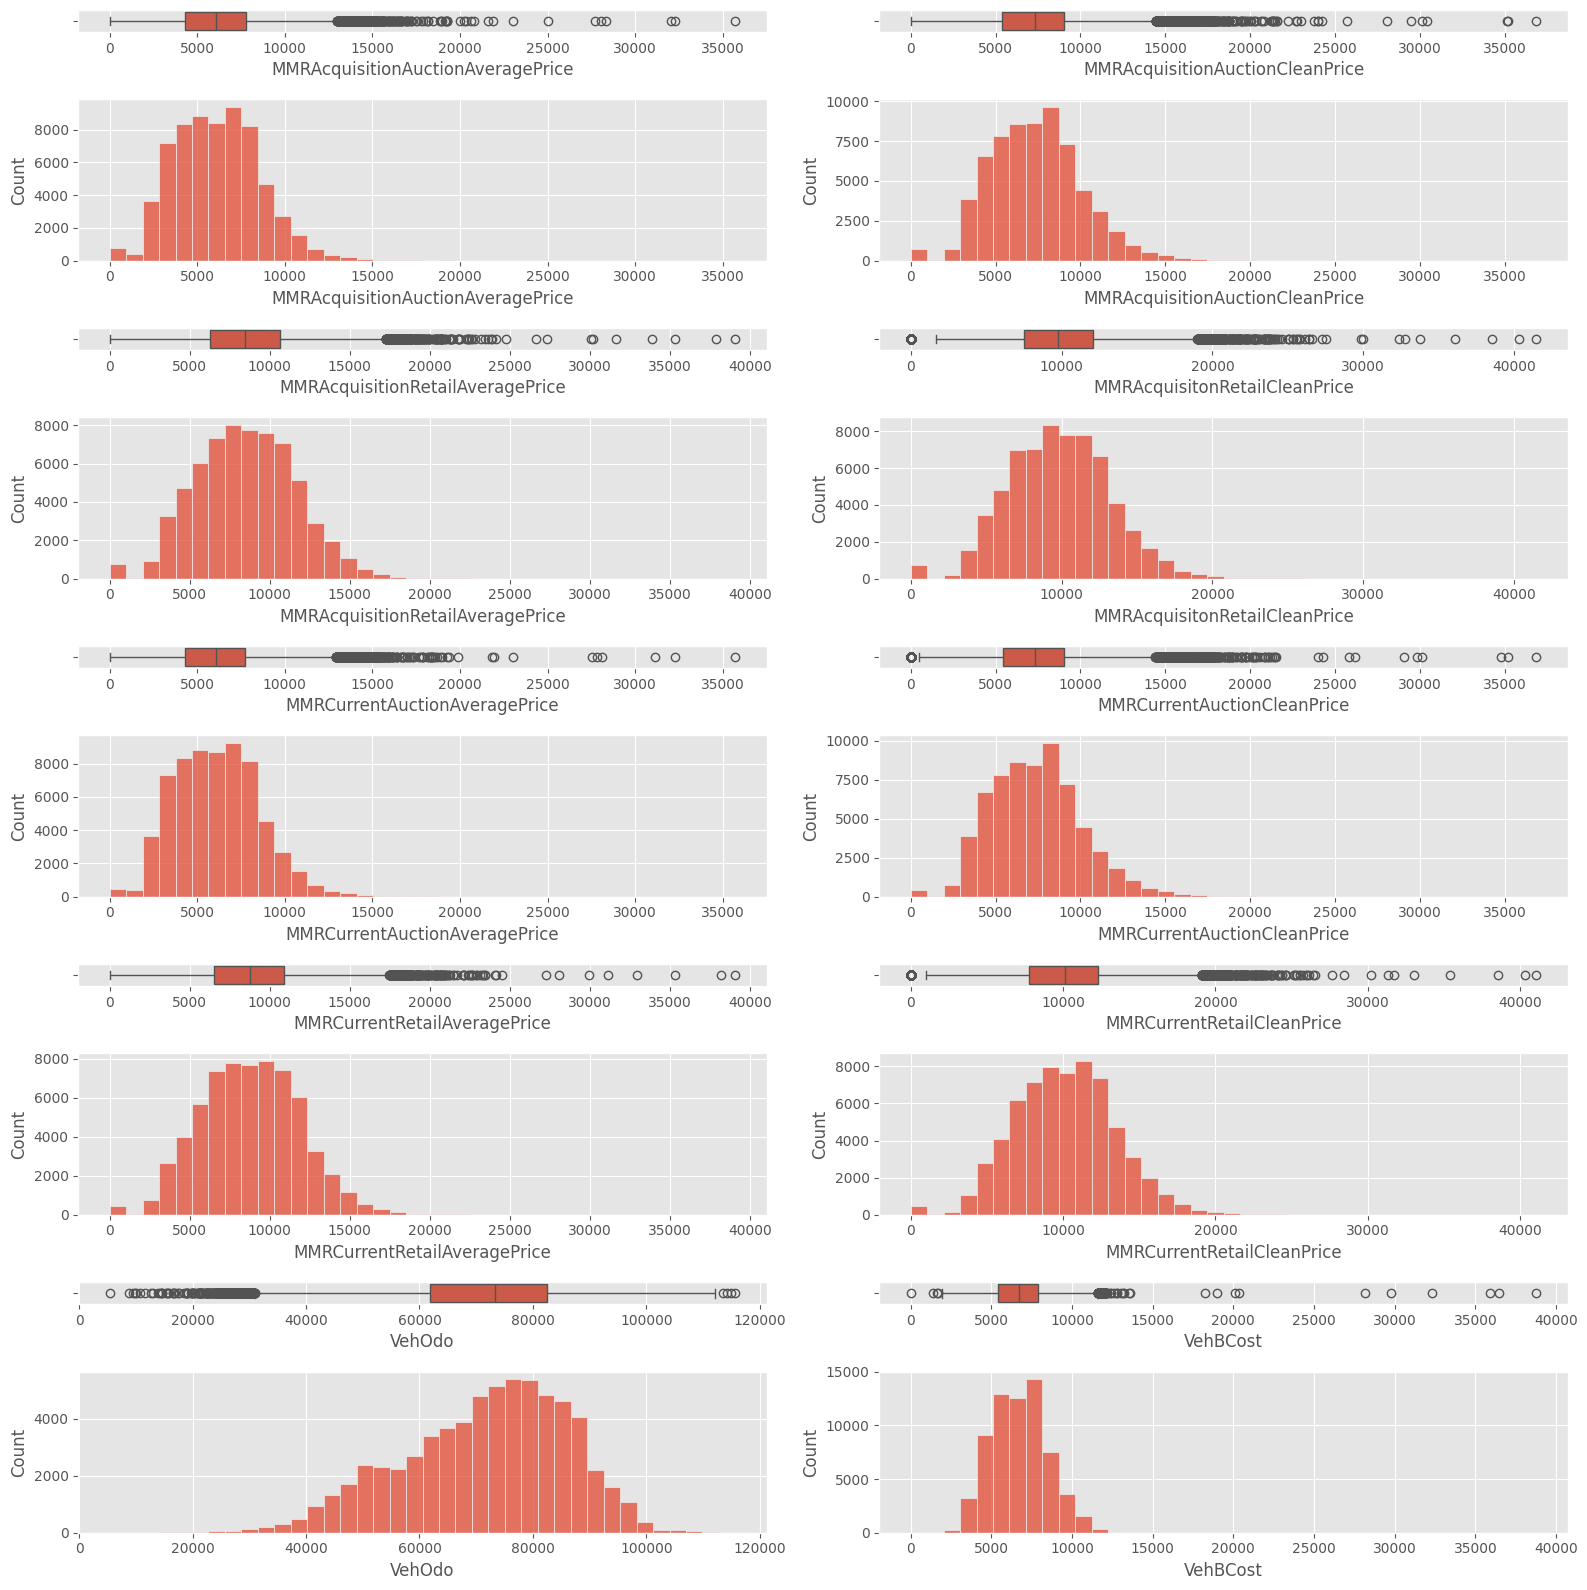

In [11]:
cols_1 = ['MMRAcquisitionAuctionAveragePrice', 
          'MMRAcquisitionRetailAveragePrice', 
          'MMRCurrentAuctionAveragePrice', 
          'MMRCurrentRetailAveragePrice', 
          'VehOdo']

cols_2 = ['MMRAcquisitionAuctionCleanPrice', 
          'MMRAcquisitonRetailCleanPrice', 
          'MMRCurrentAuctionCleanPrice',
          'MMRCurrentRetailCleanPrice', 
          'VehBCost']
# -------------------------------------------------------------------------------------------------------------------
bin = int(np.ceil(1 + 3.3* np.log(df.shape[0])))

fig, ax = plt.subplots(nrows       = 10, 
                       ncols       = 2, 
                       figsize     = (16,16), 
                       gridspec_kw = {"height_ratios": [0.12,0.88]*5})

# -------------------------------------------------------------------------------------------------------------------
for i, (col_1, col_2) in enumerate(zip(cols_1, cols_2)):                                  
    sns.boxplot(data  = df[col_1], ax = ax[i*2,0]  , orient= 'h')  
    sns.histplot(data = df[col_1], ax = ax[i*2+1,0], bins = bin)
                                     
    sns.boxplot(data  = df[col_2], ax = ax[i*2,1], orient= 'h')  
    sns.histplot(data = df[col_2], ax = ax[i*2+1,1], bins = bin)

plt.tight_layout()

## Data Cleaning

#### Missing Data

In [12]:
print('Number of missing values (NaNs) in each column', '\n', 20*'-- ')

# ----------------------------------------------- 
missing_values = df.isna().sum().to_frame(name = 'Missing_Values')
missing_values[missing_values['Missing_Values'] > 0]

Number of missing values (NaNs) in each column 
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


Missing_Values
Trim                                         2098
SubModel                                        7
Color                                           7
Transmission                                    8
WheelTypeID                                  2873
WheelType                                    2877
Nationality                                     4
Size                                            4
TopThreeAmericanName                            4
MMRAcquisitionAuctionAveragePrice              18
MMRAcquisitionAuctionCleanPrice                18
MMRAcquisitionRetailAveragePrice               18
MMRAcquisitonRetailCleanPrice                  18
MMRCurrentAuctionAveragePrice                 290
MMRCurrentAuctionCleanPrice                   290
MMRCurrentRetailAveragePrice                  290
MMRCurrentRetailCleanPrice                    290
PRIMEUNIT                                   62534
AUCGUART                                    62534
VehBCost                                       56

#### Cleaning/filling 'PRIMEUNIT' and 'AUCGUART'

In [13]:
mask            = (~df['PRIMEUNIT'].isna() & ~df['AUCGUART'].isna())             # all combinations without NaNs
combinations_df = df.loc[mask, ['PRIMEUNIT', 'AUCGUART']].drop_duplicates()      # drop dublicates to observe unique combinations only

# -----------------------------------------------------------------------------------------------------------------------
print("All ['PRIMEUNIT', 'AUCGUART'] combinations")
print("Yellow is missing in 'AUCGUART' which is PRIMEUNIT --> NO")
print('-- ' * 30, '\n')
print(combinations_df.to_string(index=False))


All ['PRIMEUNIT', 'AUCGUART'] combinations
Yellow is missing in 'AUCGUART' which is PRIMEUNIT --> NO
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  

PRIMEUNIT AUCGUART
       NO    GREEN
       NO      RED
      YES    GREEN


In [14]:
## I am assuming that nan values are 'YELLOW' - guarantee unclear category, which reflected in PRIMEUNIT as NO

df['AUCGUART'].fillna(value  ='YELLOW', inplace = True)
df['PRIMEUNIT'].fillna(value = 'NO'   , inplace = True)
combinations_df = df.loc[:, ['PRIMEUNIT', 'AUCGUART']].drop_duplicates()
# ----------------------------------------------------------------------------
print("'Yellow' and 'NO' have been used to fill NaN values in both columns")
print(combinations_df.to_string(index=False))

'Yellow' and 'NO' have been used to fill NaN values in both columns
PRIMEUNIT AUCGUART
       NO   YELLOW
       NO    GREEN
       NO      RED
      YES    GREEN


#### Cleaning Nationality, Size, TopThreeAmericanName (4 NaNs each)


In [15]:
df[df.Nationality.isna()]

IsBadBuy  PurchDate  Auction  VehYear  VehicleAge     Make  \
7909          0 2009-10-19  MANHEIM     2002           7      GMC   
18819         0 2009-10-23  MANHEIM     2006           3  HYUNDAI   
28888         0 2010-02-17    ADESA     2008           2     JEEP   
34137         0 2010-02-24    ADESA     2008           2     JEEP   

                     Model Trim      SubModel   Color Transmission  \
7909           SIERRA 1500   SL          BASE   WHITE         AUTO   
18819  ELANTRA 2.0L I4 MPI  GLS      4D SEDAN  SILVER         AUTO   
28888       PATRIOT 2WD 4C  Spo  4D SUV SPORT  SILVER         AUTO   
34137       PATRIOT 2WD 4C  Spo  4D SUV SPORT   BLACK         AUTO   

       WheelTypeID WheelType  VehOdo Nationality Size TopThreeAmericanName  \
7909           2.0    Covers   78288         NaN  NaN                  NaN   
18819          2.0    Covers   45047         NaN  NaN                  NaN   
28888          2.0    Covers   63822         NaN  NaN                  NaN   
34137          2.0    Covers   61596         NaN  NaN                  NaN   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
7909                                 0.0                              0.0   
18819                                0.0                              0.0   
28888                             8715.0                           9933.0   
34137                             8759.0                           9966.0   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
7909                                0.0                            0.0   
18819                               0.0                            0.0   
28888                           13105.0                        14129.0   
34137                           13397.0                        14222.0   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
7909                             NaN                          NaN   
18819                            NaN                          NaN   
28888                            NaN                          NaN   
34137                        10159.0                      11695.0   

       MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
7909                            NaN                         NaN        NO   
18819                           NaN                         NaN        NO   
28888                           NaN                         NaN        NO   
34137                       14026.0                     15410.0        NO   

      AUCGUART  BYRNO  VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
7909    YELLOW  16044   27542   NC    7500.0             0          1455  
18819   YELLOW  20234   89165   NV    5705.0             0           482  
28888   YELLOW  21053   85226   AZ    9655.0             0           825  
34137   YELLOW  21053   85226   AZ    9955.0             0           825

In [16]:
# Defining masks for the 3 NaN cases

mask_GMC     = ((df['Make'] == 'GMC')     & (df['Model'] == 'SIERRA 1500')) 
mask_HYUNDAI = ((df['Make'] == 'HYUNDAI') & (df['Model'] == 'ELANTRA 2.0L I4 MPI'))
mask_JEEP    = ((df['Make'] == 'JEEP')    & (df['Model'] == 'PATRIOT 2WD 4C'))
     

In [17]:
print('Mask_1 Data to be dropped, The other 2 lines can be filled')
display(df.loc[mask_GMC, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_HYUNDAI, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_JEEP, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())

Mask_1 Data to be dropped, The other 2 lines can be filled


Make        Model Nationality Size TopThreeAmericanName
7909  GMC  SIERRA 1500         NaN  NaN                  NaN

Make                Model  Nationality    Size TopThreeAmericanName
112    HYUNDAI  ELANTRA 2.0L I4 MPI  OTHER ASIAN  MEDIUM                OTHER
18819  HYUNDAI  ELANTRA 2.0L I4 MPI          NaN     NaN                  NaN

Make           Model Nationality       Size TopThreeAmericanName
650    JEEP  PATRIOT 2WD 4C    AMERICAN  SMALL SUV             CHRYSLER
28888  JEEP  PATRIOT 2WD 4C         NaN        NaN                  NaN

In [18]:
## Filling NaNs with suitable values


df.loc[mask_JEEP, ['Nationality', 'Size', 'TopThreeAmericanName']] = \
df.loc[mask_JEEP, ['Nationality', 'Size', 'TopThreeAmericanName']] \
    .fillna({'Nationality'         : 'AMERICAN', 
             'Size'                : 'SMALL SUV', 
             'TopThreeAmericanName': 'CHRYSLER'}) #, inplace = True)
# --------------------------------------------------------------------------------

df.loc[mask_HYUNDAI, ['Nationality', 'Size', 'TopThreeAmericanName']] = \
df.loc[mask_HYUNDAI, ['Nationality', 'Size', 'TopThreeAmericanName']] \
    .fillna({'Nationality'         : 'OTHER ASIAN', 
             'Size'                : 'MEDIUM', 
             'TopThreeAmericanName': 'OTHER'}) #, inplace = True)

In [19]:
df[df.Nationality.isna()]

IsBadBuy  PurchDate  Auction  VehYear  VehicleAge Make        Model  \
7909         0 2009-10-19  MANHEIM     2002           7  GMC  SIERRA 1500   

     Trim SubModel  Color Transmission  WheelTypeID WheelType  VehOdo  \
7909   SL     BASE  WHITE         AUTO          2.0    Covers   78288   

     Nationality Size TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
7909         NaN  NaN                  NaN                                0.0   

      MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
7909                              0.0                               0.0   

      MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
7909                            0.0                            NaN   

      MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
7909                          NaN                           NaN   

      MMRCurrentRetailCleanPrice PRIMEUNIT AUCGUART  BYRNO  VNZIP1 VNST  \
7909                         NaN        NO   YELLOW  16044   27542   NC   

      VehBCost  IsOnlineSale  WarrantyCost  
7909    7500.0             0          1455

In [20]:
# Test the previous code 
display(df.loc[mask_GMC, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_HYUNDAI, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_JEEP, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())

Make        Model Nationality Size TopThreeAmericanName
7909  GMC  SIERRA 1500         NaN  NaN                  NaN

Make                Model  Nationality    Size TopThreeAmericanName
112  HYUNDAI  ELANTRA 2.0L I4 MPI  OTHER ASIAN  MEDIUM                OTHER

Make           Model Nationality       Size TopThreeAmericanName
650  JEEP  PATRIOT 2WD 4C    AMERICAN  SMALL SUV             CHRYSLER

In [21]:
# 'Transmission' feature need to be cleaned
df['Transmission'].value_counts()

Transmission
AUTO      63288
MANUAL     2323
Manual        1
Name: count, dtype: int64

In [22]:
df.loc[df['Transmission'] == 'Manual', 'Transmission'] = 'MANUAL'
df['Transmission'].value_counts()

Transmission
AUTO      63288
MANUAL     2324
Name: count, dtype: int64

In [23]:

categorical_col = df.select_dtypes(include=['object', 'category'])

print("Categorical unique count and values\n", '-- '*30)
pd.DataFrame({
                                 'NaN Count'    : categorical_col.isna().sum(),
                                 'Unique Count' : categorical_col.nunique(),
                                 'Column Unique': categorical_col.apply(lambda col: col.unique().tolist())
                               })


Categorical unique count and values
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


NaN Count  Unique Count  \
Auction                       0             3   
Make                          0            29   
Model                         0          1029   
Trim                       2098           134   
SubModel                      7           840   
Color                         7            16   
Transmission                  8             2   
WheelType                  2877             3   
Nationality                   1             4   
Size                          1            12   
TopThreeAmericanName          1             4   
PRIMEUNIT                     0             2   
AUCGUART                      0             3   
VNST                          0            34   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Column Unique  
Auction                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

#### combinations of ['WheelTypeID','WheelType'], Type_0 to be introduced

In [24]:
## All possible combinations of ['WheelTypeID','WheelType']   --> finding redundant columns/features or info
df.loc[:, ['WheelTypeID','WheelType']].drop_duplicates()

WheelTypeID WheelType
0              1.0     Alloy
1              2.0    Covers
13             NaN       NaN
23             3.0   Special
14451          0.0       NaN

In [25]:
# Replace 'NaN' with 'Type_0' when 'WheelTypeID' is 0.0
df.loc[(df['WheelTypeID'] == 0.0) & (df['WheelType'].isna()), 'WheelType'] = 'Type_0'

# Verify the changes
print('WheelType --> Type_0, whenever WheelTypeID is 0.0\n')
df.loc[:, ['WheelTypeID', 'WheelType']].drop_duplicates()

WheelType --> Type_0, whenever WheelTypeID is 0.0



WheelTypeID WheelType
0              1.0     Alloy
1              2.0    Covers
13             NaN       NaN
23             3.0   Special
14451          0.0    Type_0

#### All possible combinations of ['VehYear','VehicleAge']

In [26]:
## All possible combinations of ['VehYear','VehicleAge']   --> finding redundant columns/features or info
df.loc[:, ['VehYear','VehicleAge']].drop_duplicates().sort_values(by = 'VehYear').style.hide()     # used to be hide_index()



#### Converting Object feature type to category

In [27]:
mask     = df.select_dtypes(include='object').columns
df[mask] = df[mask].astype('category')
# --------------------------------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  category      
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  category      
 6   Model                              65620 non-null  category      
 7   Trim                               63522 non-null  category      
 8   SubModel                           65613 non-null  category      
 9   Color                              65613 non-null  category      
 10  Transmission                      

#### Read Dataframe, using CLEAN_ALL_DATA funbction

In [28]:
from Functions import CLEAN_All_DATA
# --------- Read the Data ---------------

df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

In [29]:
print(f'The shape of df is     : {df.shape}')                                 
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is : {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is : {y_test.shape}')

The shape of df is     : (65620, 32)
The shape of X_train is: (59058, 33)
The shape of X_test is : (6562, 33)
The shape of y_train is: (59058,)
The shape of y_test is : (6562,)
